In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [3]:
#cross_value 와 비교
from sklearn.model_selection import cross_val_score

cvscores = cross_val_score(gbrt,X_test,y_test , cv=5)
print("테스트 세트의 정확도 C5V=5: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(gbrt,X_test,y_test,cv=10)
print("테스트 세트의 정확도 CV=10: {:.3f}\n".format(cvscores.mean() ))

테스트 세트의 정확도 C5V=5: 0.937

테스트 세트의 정확도 CV=10: 0.918



In [4]:
#최대깊이 줄여 사전 가지치기를 강하게 하기 -> 과적합을 피하고 테스트 데이터 성능 상향
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X_test,y_test,cv=10)
print("테스트 세트의 정확도 CV=10: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(gbrt,X_test,y_test , cv=5)
print("테스트 세트의 정확도 C5V=5: {:.3f}\n".format(cvscores.mean() ))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
테스트 세트의 정확도 CV=10: 0.938

테스트 세트의 정확도 C5V=5: 0.951



In [5]:
#학습률 값 조정 -> 테스트 데이터 성능 조금 향상
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

cvscores = cross_val_score(gbrt,X_test,y_test,cv=10)
print("테스트 세트의 정확도 CV=10: {:.3f}\n".format(cvscores.mean() ))

cvscores = cross_val_score(gbrt,X_test,y_test , cv=5)
print("테스트 세트의 정확도 C5V=5: {:.3f}\n".format(cvscores.mean() ))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965
테스트 세트의 정확도 CV=10: 0.917

테스트 세트의 정확도 C5V=5: 0.917



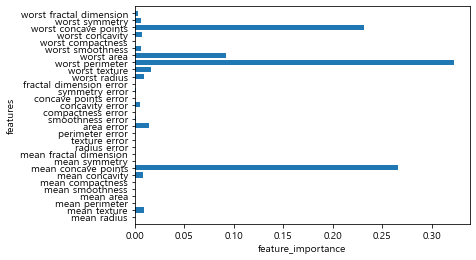

In [6]:
#gbrt 알고리즘의 각 특성 중요도 체크
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature_importance')
    plt.ylabel('features')
    plt.ylim(-1,n_features)

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

In [48]:
from preamble import *

Xm ,ym = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(
    Xm,ym,stratify=ym, random_state = 42)

cancer = load_breast_cancer()
Xc_train,Xc_test,yc_train,yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0) 

In [49]:
bag_clf = BaggingClassifier(
    LogisticRegression(), n_estimators=5,
    oob_score = True, random_state = 40)
bag_clf.fit(Xm_train,ym_train)


print("훈련 세트 정확도: {:.3f}".format(bag_clf.score(Xm_train,ym_train)))
print("테스트 세트 정확도: {:.3f}".format(bag_clf.score(Xm_test,ym_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(bag_clf.oob_score_))

훈련 세트 정확도: 0.880
테스트 세트 정확도: 0.800
OOB 샘플의 정확도 : 0.827


D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


In [50]:
bag_clf2 = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=5,
       random_state = 42)
bag_clf2.fit(Xm_train,ym_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  random_state=42)

In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train,ym_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

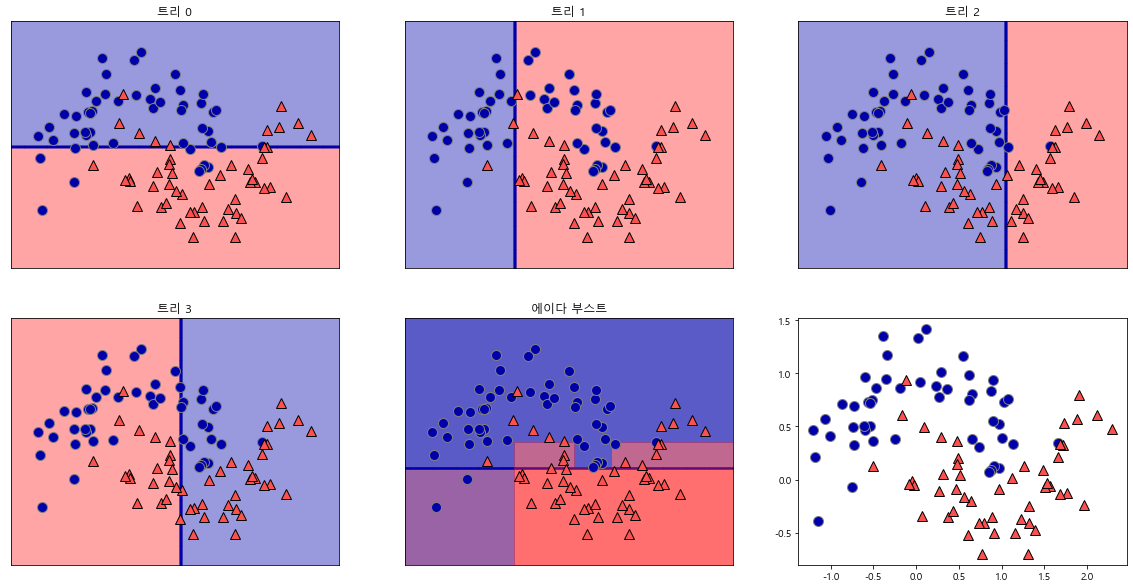

In [52]:
#moon_datasets에 에이다부스트를 이용하여 결정경계 그리기
fig , axes = plt.subplots(2,3, figsize = (20,10))
for i , (ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax= axes[-1,1],alpha = .4)
axes[-1,1].set_title("에이다 부스트")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [25]:
#cancer data 에 적용
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train,yc_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [26]:
print("훈련 세트의 정확도:{:.3f}".format(ada.score(Xc_train,yc_train)))
print("테스트 세트의 정확도:{:.3f}".format(ada.score(Xc_test,yc_test)))

훈련 세트의 정확도:1.000
테스트 세트의 정확도:0.986


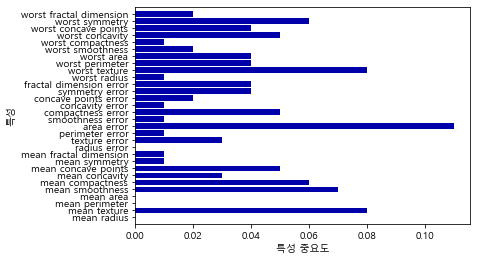

In [27]:
#에이다부스트를 이용한 cancer data 의 특성 중요도 처리
n_features = cancer.data.shape[1]
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)
plt.show()

In [28]:
#앙상블에 대해 학습하기
#samples 수 1000으로 하면 투표 방식에 따라서 결과값이 달라지는 것을 확인할 수 있다.

X, y = make_moons(n_samples=1000, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# 보팅클래스 : 랜덤포레스트, 로지스틱회귀, 결정트리

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#estimator 넣기
log_clf = LogisticRegression(solver='lbfgs', random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

voting_clf = VotingClassifier(
    estimators = [('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)], voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [29]:
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.852
RandomForestClassifier 0.912
DecisionTreeClassifier 0.884
VotingClassifier 0.88


In [30]:
voting_clf = VotingClassifier(
    estimators = [('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)], voting='soft')
voting_clf.fit(X_train,y_train)

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.852
RandomForestClassifier 0.912
DecisionTreeClassifier 0.884
VotingClassifier 0.892


In [53]:
#테스트 결과가 이정도 되겠다고 추측 가능
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap = True, oob_score = True, random_state = 40)
bag_clf.fit(X_train,y_train)

#obb(out of bag)-score 출력
print('oob_score : ',bag_clf.oob_score_)

#decisiontree bagging
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

oob_score :  0.9026666666666666


0.904

In [66]:
#gradient Boosting 최적화
pip install xgboost
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 100, max_depth = 3,
                                random_state = 42, eval_metric='logloss')
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred)

SyntaxError: invalid syntax (<ipython-input-66-35cf6d2f51cd>, line 2)

Text(0, 0.5, '특성1')

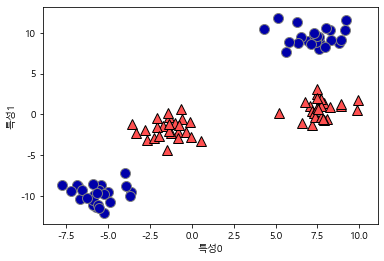

In [54]:
#선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋
X,y  = make_blobs(centers=4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성0")
plt.ylabel("특성1")

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성1')

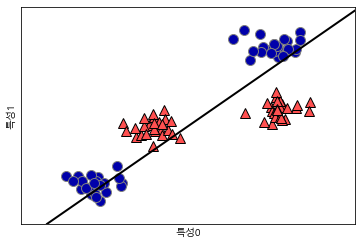

In [55]:
#분류를 위한 선형모델은 직선으로만 데이터를 나눌 수 있어서 잘 맞지 않는 것을 확인할 수 있다.
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성0")
plt.ylabel('특성1')

Text(0.5, 0, '특성1**2')

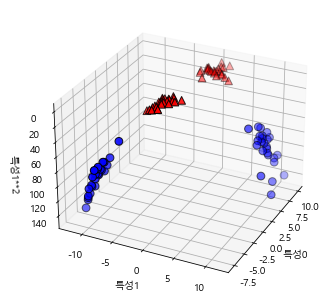

In [57]:
#2차원 그래프를 3차원으로 확장시키기

#두 번쨰 특성을 제곱하여 추가(차원 추가)
X_new = np.hstack([X, X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#3차원 그래프 그리기

ax = Axes3D(figure, elev=-152, azim = -26)

#y ==0 인 포인트를 먼저 그리고 그 다음 y==1 인 포인트 그리기
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c='b',
          cmap = mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^', cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1**2')

Text(0.5, 0, '특성1**2')

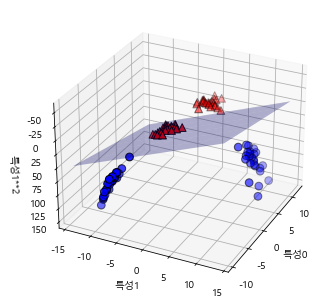

In [58]:
#3차원으로 확장하니 기존 2차원에서는 직선으로 밖에 나눌 수없어서 나눠지지 않던 경계가 나눠지는 것을 확인할 수 있다.
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
#선형 결정 경계 그리기

figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1]* YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c='b',
          cmap = mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^', cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1**2')

Text(0, 0.5, '특성1')

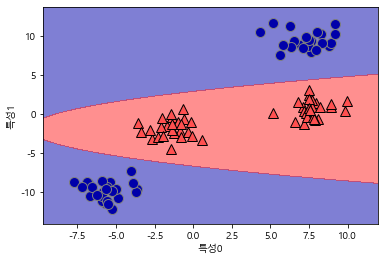

In [59]:
#직선이 아닌 타원형으로 해서 두 특성의 결정경계가 나타나는 것을 확인할 수 있다.
ZZ = YY ** 2
dec =  linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY,dec.reshape(XX.shape), levels= [dec.min(), 0 , dec.max()], cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성1')

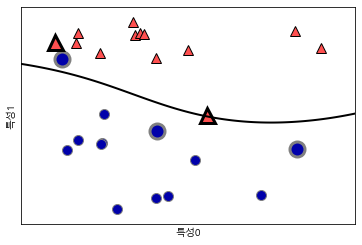

In [60]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
#데이터 포인터 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#서포트 벡터
sv = svm.support_vectors_
#dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블 결정
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels, s= 15, markeredgewidth=3)
plt.xlabel("특성0")
plt.ylabel("특성1")

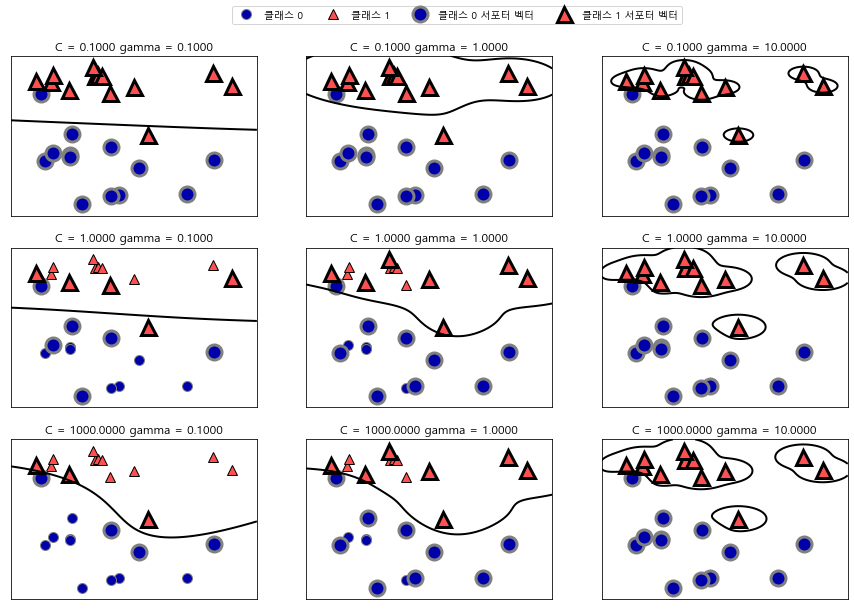

In [61]:
#svm 의 매개변수 C 와 감마 튜닝해보기
#감마 값이 클수록 개개의 특성에 민감해지고 더 복잡한 모델을 만들어준다.
#C 값이 작을 수록 제약이 커지게 된다. 잘못 분류된 포인터가 결정경계에 큰 영향을 주지 않지만 C 값이 커질수록
# 개개의 포인터에 더 맞춰지게 된다.
fig ,axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)

axes[0,0].legend(['클래스 0','클래스 1', '클래스 0 서포터 벡터', '클래스 1 서포터 벡터'], ncol=4, loc=(.9,1.2))

In [62]:
#버전이 달라져서  그냥 svc = SVC() 로하면 전처리가 되서 정확도 점수가 나오게 된다.
#따라서 책에 나온대로 결과를 보기 위해서 특성값과 감마, C 값을 직접 제어해준다.

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

n_features = X_train.shape[1]
svc = SVC(C=1, gamma=1/n_features)
svc.fit(X_train,y_train)

print('훈련 세트 정확도 :{:.2f}'.format(svc.score(X_train,y_train)))
print('테스트 세트 정확도 :{:.2f}'.format(svc.score(X_test,y_test)))

훈련 세트 정확도 :1.00
테스트 세트 정확도 :0.63


In [63]:
#데이터 전처리과정
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

#훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
#훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

#훈련데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0 최댓값은 1이 된다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis=0))
print('특성별 최댓값\n', X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [64]:
#테스트 세트에도 같은 작업 적용하지만 훈련세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [65]:
#현재 최신 버전으로 gamma = auto 이고 scale 옵션이 추가된 현재 버전
svc = SVC()
svc.fit(X_train_scaled,y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도 : 0.972


In [66]:
#현재 최신 버전으로 gamma = auto 이고 scale 옵션이 추가된 현재 버전 + C값 제어 (규제 완화 -> 과대적합)
svc = SVC(C = 1000)
svc.fit(X_train_scaled,y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도 : 0.958


In [67]:
#현재 최신 버전으로 gamma = auto 이고 scale 옵션이 추가된 현재 버전 + C값 제어 ( 규제 강화 -> 과소적합)
svc1 = SVC(C = 0.001)
svc1.fit(X_train_scaled,y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc1.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc1.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.627
테스트 세트 정확도 : 0.629


In [68]:
#전처리를 했더니 훈련세트 정확도가 조금 줄었지만 테스트 세트에서 정확도가 증가하는 것을 확인할 수 있었다.
n_features = X_train.shape[1]
svc = SVC(C=1, gamma=1/n_features)
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도 : 0.951


In [69]:
# C(패널티)값을 완화시켜 주니 성능이 더 향상되는 것을 확인하였다.
n_features = X_train.shape[1]
svc = SVC(C=1000, gamma=1/n_features)
svc.fit(X_train_scaled,y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도 : 0.972


In [70]:
#규제를 강화하니 성능이 대체적으로 떨어지는 것을 확인할 수 있었다.
svc = SVC(C=0.01, gamma=1/n_features)
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.627
테스트 세트 정확도 : 0.629


In [71]:
#linearSVC 이용
from sklearn.svm import LinearSVC
linsvc = LinearSVC()
linsvc.fit(X_train_scaled, y_train)

LinearSVC()

In [72]:
#전처리한 cancer 데이터를 이용 기준으로 SVC와 비교해서 훈련 세트 정확도는 비슷하나
# 테스트세트 정확도는 linearSVC가 조금 더 낮게 나왔다. 
print('훈련 세트 정확도: {:.3f}'.format(linsvc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(linsvc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도 : 0.965


Text(0, 0.5, 'relu(x), tanh(x)')

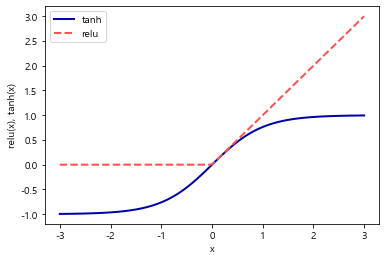

In [77]:
#신경망에서 사용하는 활성화함수 plot해보기
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line,0), linestyle = '--', label = 'relu')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

Text(0, 0.5, '특성1')

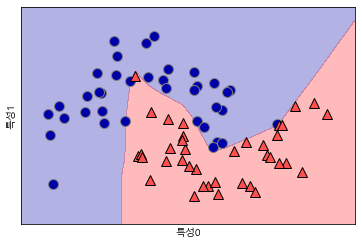

In [78]:
from sklearn.neural_network import MLPClassifier

X,y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

X_train,X_test,y_train,y_test = train_test_split(X,y , stratify = y, random_state =42)

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, '특성1')

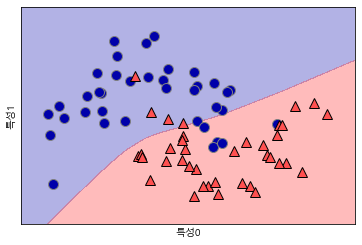

In [85]:
#solver 옵션을 adam 으로 했을때 결정경계의 차이비교 
#adam 으로 한후 max_iter 옵션의 차이 비교 
from sklearn.neural_network import MLPClassifier

X,y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

X_train,X_test,y_train,y_test = train_test_split(X,y , stratify = y, random_state =42)

mlp = MLPClassifier(solver = 'adam',random_state = 0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성1')

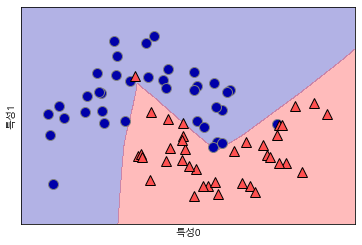

In [87]:
#adam 옵션은 반복횟수가 많아질수록 더 정확하게 분류한다는 사실을 알 수 있다.
mlp = MLPClassifier(solver = 'adam', max_iter = 100000, random_state = 0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성1')

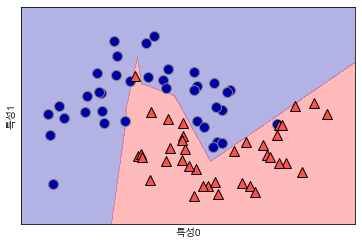

In [88]:
#은닉 유닛을 10개로 증가하여 학습시킨 모델
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes=[10],
                   max_iter = 1000)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성1')

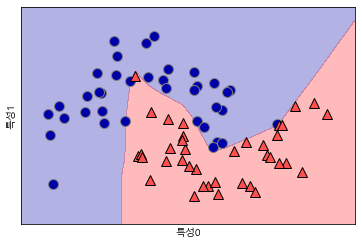

In [89]:
#은닉 유닛이 증가할 수록 구분이 좀 더 확실해 지는 것을 확인할 수 있다.
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes=[100],
                   max_iter = 1000)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성1')

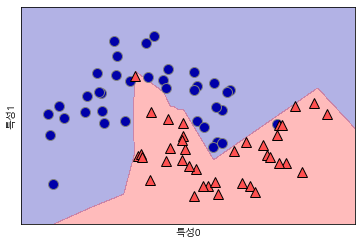

In [90]:
#10개의 은닉유닛이 2층이 있는 은닉층과 렐루 활성화 함수로 만든 결정경계
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes=[10,10])
                   
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '특성1')

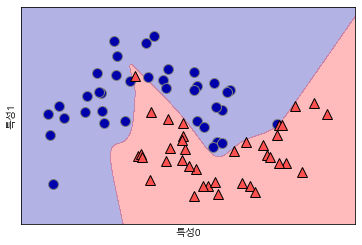

In [92]:
#10개의 은닉유닛이 2층이 있는 은닉층과 tanh 활성화 함수로 만든 결정경계
#렐루에 비해 결정경계가 좀 더 부드럽다.
mlp = MLPClassifier(solver = 'lbfgs', activation = 'tanh', random_state = 0, hidden_layer_sizes=[10,10]
                   ,max_iter = 1000)
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

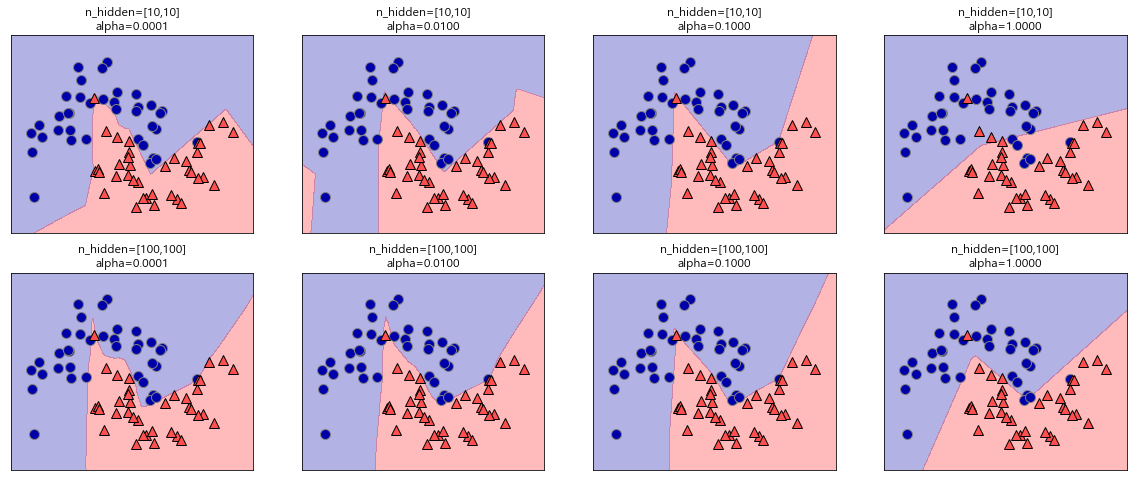

In [97]:
#hidden_nodes 의 유닛수, 층 수 그리고 alpha 값에 따른 결정경계의 차이 비교
#비교적으로 같은 알파값에서는 은닉수가 많을수록, 은닉층이 많을수록 결정경계의 구분이 더 정확해졌다.
#알파값이 커질수록 규제가 강해져 일반화 되는 양상을 보였다.
fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, max_iter = 1000, 
                            hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes],alpha = alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha=.3, ax = ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha)) 

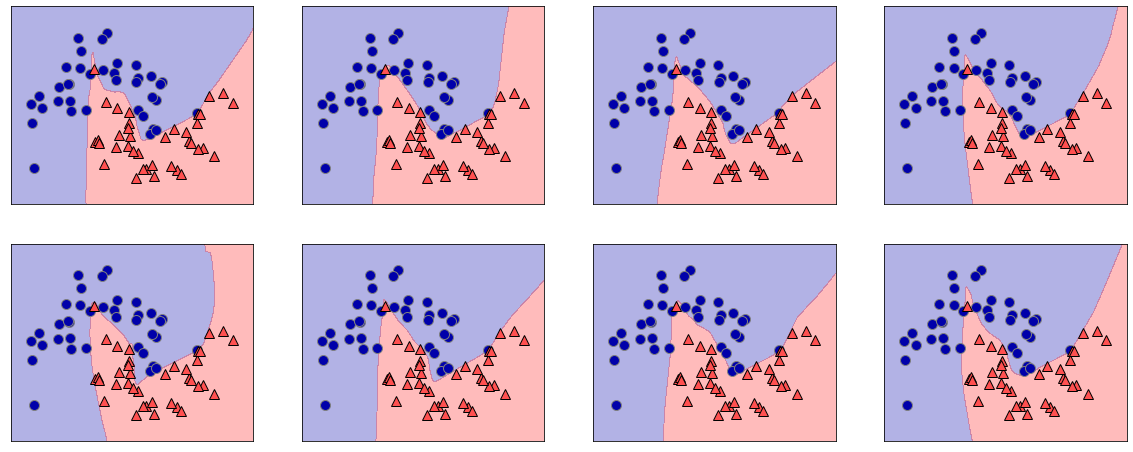

In [99]:
#random_state 값에 따른 결정경계의 차이 비교
fig, axes = plt.subplots(2,4, figsize = (20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver = 'lbfgs', random_state = i,
                       hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, ax=ax)

In [100]:
#실제 데이터인 유방암셋 신경망에 적용해보기
print("유방암 데이터의 특성별 최댓값:\n", cancer.data.max(axis=0) )

유방암 데이터의 특성별 최댓값:
 [  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [102]:
#신경망의 정확도 점수
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("테스트 세트의 정확도 :{:.2f}".format(mlp.score(X_train,y_train)))
print("훈련 세트의 정확도 :{:.2f}".format(mlp.score(X_test,y_test)))

테스트 세트의 정확도 :0.94
훈련 세트의 정확도 :0.92


In [107]:
#신경망도 SVC 처럼 데이터 전처리가 중요하다.
#전처리를 해주니 점수가 훨씬 좋게 나오는 것을 확인할 수 있다.

#훈련 세트 각 특성의 평균을 계산한다.
mean_on_train = X_train.mean(axis=0)
#훈련 세트 각 특성의 표준 편차를 계산한다.
std_on_train = X_train.std(axis=0)

#데이터에서평균을 빼고 표준편차로 나누면 평균0, 표준편차1 인 데이터로 변환된다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)
print("테스트 세트의 정확도 :{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("훈련 세트의 정확도 :{:.3f}".format(mlp.score(X_test_scaled,y_test)))

테스트 세트의 정확도 :0.991
훈련 세트의 정확도 :0.965


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
#max_iter 의 값을 늘려주어 반복횟수를 늘리면 성능이 다소 더 오르긴하나 과대적홥되는
#양상을 보여주었다.
mlp = MLPClassifier(random_state = 0, max_iter = 1000)
mlp.fit(X_train_scaled, y_train)
print("테스트 세트의 정확도 :{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("훈련 세트의 정확도 :{:.3f}".format(mlp.score(X_test_scaled,y_test)))

테스트 세트의 정확도 :1.000
훈련 세트의 정확도 :0.972


In [110]:
#alpha값을 키워서 규제를 강화해주니 과대적합을 막을 수 있었다.
mlp = MLPClassifier(random_state = 0, max_iter = 1000, alpha = 1)
mlp.fit(X_train_scaled, y_train)
print("테스트 세트의 정확도 :{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("훈련 세트의 정확도 :{:.3f}".format(mlp.score(X_test_scaled,y_test)))

테스트 세트의 정확도 :0.988
훈련 세트의 정확도 :0.972


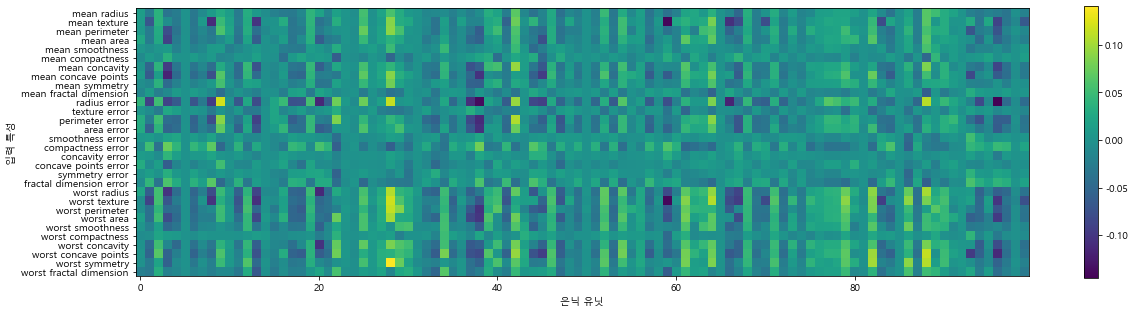

In [111]:
#특성의 중요도를 색으로 표현
#어느정도의 중요도를 가지고 있나 대충 볼 수 있지만 정확한 파악은 하기 힘들다.
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise = 0.25, factor=0.5, random_state=1)

#예제를 위해 클래스의 이름을 blue 와 red 로 변경
y_named = np.array(['blue','red'])[y]

#여러개의 배열을 한꺼번에 train_test_split에 넣을 수 있다
#훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같다.
X_train,X_test,y_train_named,y_test_named,y_train,y_test = \
    train_test_split(X,y_named, y, random_state=0)
    
#그레디언트 부스팅 모델을 만든다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(random_state=0)

In [113]:
#결정 함수
print("X_test.shape: ", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape:  (25, 2)
결정 함수 결과 형태: (25,)


In [114]:
#결정함수의 결과 출력하기
#결정함수의 부호를 보고 결과를 예측해 볼 수 있다.
# 양수 = true = red, 음수 = false = blue
print("결정 함수\n", gbrt.decision_function(X_test))

결정 함수
 [ 4.136 -1.702 -3.951 -3.626  4.29   3.662 -7.691  4.11   1.108  3.408
 -6.463  4.29   3.902 -1.2    3.662 -4.172 -1.23  -3.916  4.036  4.11
  4.11   0.657  2.698 -2.657 -1.868]


In [115]:
print("임계치의 결정 함수 결과 비교: \n", gbrt.decision_function(X_test) > 0)
print("예측: \n", gbrt.predict(X_test))

임계치의 결정 함수 결과 비교: 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측: 
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [116]:
#불리언의 결과값을 0과 1로 바꾼다,
greater_zero = (gbrt.decision_function(X_test)>0).astype(int)
#classes_에 인덱스로 사용
pred = gbrt.classes_[greater_zero]
#pred와 gbrt.predict 의 값을 비교한다.
print("pred 는 예측결과와 같다:", np.all(pred==gbrt.predict(X_test)))

pred 는 예측결과와 같다: True


In [117]:
#decision_function 의 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.
decision_function = gbrt.decision_function(X_test)
print("결정함수 최솟값: {:.2f} 최댓값:{:.2f}".format(np.min(decision_function),np.max(decision_function)))

결정함수 최솟값: -7.69 최댓값:4.29


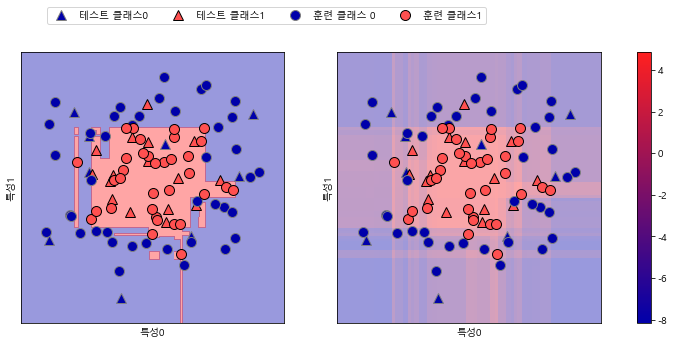

In [120]:
#2차원 예제 데이터셋을 사용해 만든 그레디언트 부스팅 모델의 결졍경계와 결정함수
fig,axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    #훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스0', '테스트 클래스1', '훈련 클래스 0', '훈련 클래스1'], ncol=4, loc=(.1,1.1))

In [121]:
#예측확률
#predict_proba 의 출력은 각 클래스에 대한 확률이다. 값의 크기는 이진분류에선느 항상 (n_sampels,2 )이다.
print("확률 값의 형태 :",gbrt.predict_proba(X_test).shape)

확률 값의 형태 : (25, 2)


In [122]:
#예측확률값 출력 확률값이기 때문에 더해서 1이 된다.
print("예측 확률\n", gbrt.predict_proba(X_test))

예측 확률
 [[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]
 [1.    0.   ]
 [0.016 0.984]
 [0.248 0.752]
 [0.032 0.968]
 [0.998 0.002]
 [0.014 0.986]
 [0.02  0.98 ]
 [0.769 0.231]
 [0.025 0.975]
 [0.985 0.015]
 [0.774 0.226]
 [0.98  0.02 ]
 [0.017 0.983]
 [0.016 0.984]
 [0.016 0.984]
 [0.341 0.659]
 [0.063 0.937]
 [0.934 0.066]
 [0.866 0.134]]


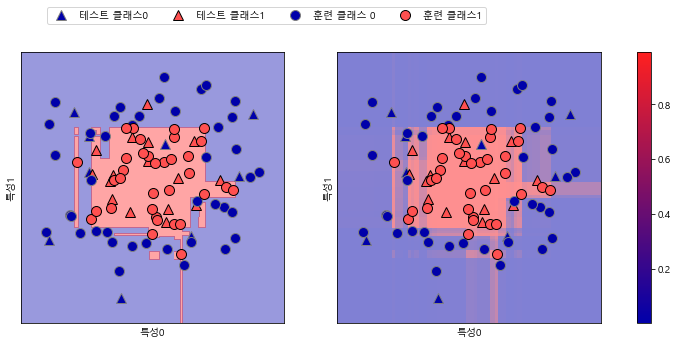

In [124]:
#그래프의 경계가 훨씬 선명하며 불분명한 것도 줄어든 것을 확인할 수 있다.
fig,axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(
    gbrt,X,ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt,X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function="predict_proba")

for ax in axes:
    #훈련 포인트와 테스트  포인터 그리기
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
#colorbar를 감추지 않는다.
cbar =  plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스0', '테스트 클래스1', '훈련 클래스 0', '훈련 클래스1'], ncol=4, loc=(.1,1.1))

In [127]:
#2진 분류 데이터가아닌 다차원 분류 데이터로 결정함수와  예측확률 구해보기
#load_iris 의 타깃은 3개
from sklearn.datasets import load_iris

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state =0)
gbrt.fit(X_train,y_train)

#결정함수 결과 형태는 (n_samples, n_classes(타겟의 수))
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
print("결정 함수의 결과: \n", gbrt.decision_function(X_test))

결정 함수의 결과 형태: (38, 3)
결정 함수의 결과: 
 [[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]
 [-1.996  0.048 -1.927]
 [-1.997 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.996  0.048 -1.927]
 [-1.997 -1.876  0.079]
 [ 0.061 -1.908 -1.928]
 [ 0.061 -1.908 -1.928]
 [ 0.061 -1.908 -1.928]
 [ 0.061 -1.908 -1.928]
 [-1.996  0.048 -1.927]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.996  0.048 -1.927]
 [-1.991 -1.876  0.097]
 [ 0.061 -1.908 -1.928]
 [-1.997 -1.864  0.042]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.991 -1.876  0.079]
 [-1.991 -1.876  0.097]
 [-1.991 -1.876  0.097]
 [-1.991 -1.876  0.079]
 [ 0.061 -1.908 -1.928]
 [ 0.061 -1.908 -1.928]
 [ 0.061 -1.908 -1.928]
 [ 0.061 -1.908 -1.928]
 [-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [ 0.061 -1.908 -1.928]
 [-1.997 -1.876  0.042]
 [-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]]


In [128]:
#각 열에서 수치가 가장 크면 그 클래스일 확률이 높다.
#결정함수의 데이터 포인트들마다 가장 큰값을 찾아 클래스 값을 예측해 볼 수 있다.
print("가장 큰 결정함수의 인덱스 :\n", np.argmax(gbrt.decision_function(X_test),axis=1))
print("예측 :\n", gbrt.predict(X_test))

가장 큰 결정함수의 인덱스 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [130]:
#predict_proba 의 결과값을 확인한다.
#출력값 크기는 결정함수와 마찬가지로 (n_samples, n_classes) 가 나오게 된다.
print("예측 확률의 형태:",gbrt.predict_proba(X_test).shape)
print("예측 확률: \n",gbrt.predict_proba(X_test))
#확률 값이기 때문에 행 방향으로 모든확률을 더하면 1이 나오게 된다.
print("합 : ", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률의 형태: (38, 3)
예측 확률: 
 [[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]
 [0.102 0.788 0.109]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.102 0.788 0.109]
 [0.099 0.112 0.789]
 [0.783 0.109 0.107]
 [0.783 0.109 0.107]
 [0.783 0.109 0.107]
 [0.783 0.109 0.107]
 [0.102 0.788 0.109]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.102 0.788 0.109]
 [0.098 0.11  0.792]
 [0.783 0.109 0.107]
 [0.102 0.116 0.782]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.1   0.112 0.789]
 [0.098 0.11  0.792]
 [0.098 0.11  0.792]
 [0.1   0.112 0.789]
 [0.783 0.109 0.107]
 [0.783 0.109 0.107]
 [0.783 0.109 0.107]
 [0.783 0.109 0.107]
 [0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.783 0.109 0.107]
 [0.102 0.115 0.783]
 [0.102 0.788 0.109]
 [0.783 0.109 0.107]]
합 :  [1. 1. 1. 1. 1. 1.]


In [131]:
#결정 함수와 비슷하게 가장 큰 확률값을 가진 것이 클래스일 확률이 높다.
print("가장 큰 예측 확률의 인덱스: \n", np.argmax(gbrt.predict_proba(X_test),axis=1))
print("예측 :\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측 :
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [135]:
#결정함수와 예측확률을 비교하려면 classes_ 속성을 이용해 클래스의 실제 이름을 얻어와야 한다.
logreg = LogisticRegression()

#iris데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train,named_target)
print("훈련 데이터에 있는 클래스의 종류:", logreg.classes_)
#예측값 앞에서 10개까지만 출력
print("예측: ",logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classes_ 에 연결:" , logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스의 종류: ['setosa' 'versicolor' 'virginica']
예측:  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_ 에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
